In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

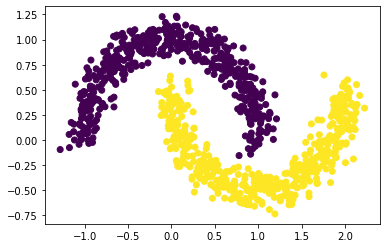

In [57]:
X, y = make_moons(n_samples=1000, random_state=43, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [58]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X = torch.Tensor(X)
y = torch.Tensor(y)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [100]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
        

In [101]:
model = LogisticRegression(input_size=2)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [102]:
prev_loss = 0
for epoch in range(10000):
    model.train() # Set the model to training mode
    y_pred = model(X) # Evaluate the model on the training data
    loss = loss_fn(y_pred, y) # Calculate the loss

    # Early stopping 
    if (abs(loss.item() - prev_loss)) < 1e-6:
        print(f"Converged after {epoch} epochs")
        break
    # print("Model params: ", model.state_dict())
    optimizer.zero_grad() # Reset the gradients for optimizer
    loss.backward() # Calculate the gradients for loss_fn wrt model parameters
    optimizer.step() # Update the model parameters

    model.eval() # Set the model to evaluation mode
    y_pred_test = model(X_test) # Evaluate the model on the test data
    loss_test = loss_fn(y_pred_test, y_test) # Calculate the loss


    
    prev_loss = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}, loss_test: {loss_test.item()}")

Epoch: 0, loss: 0.766612708568573, loss_test: 0.7439582943916321
Epoch: 1000, loss: 0.40310829877853394, loss_test: 0.3847738802433014
Epoch: 2000, loss: 0.340172678232193, loss_test: 0.32594048976898193
Epoch: 3000, loss: 0.3125418424606323, loss_test: 0.30142942070961
Epoch: 4000, loss: 0.2961733043193817, loss_test: 0.28756067156791687
Epoch: 5000, loss: 0.28521692752838135, loss_test: 0.27865010499954224
Epoch: 6000, loss: 0.27741673588752747, loss_test: 0.27253833413124084
Epoch: 7000, loss: 0.27165067195892334, loss_test: 0.26817286014556885
Epoch: 8000, loss: 0.2672732472419739, loss_test: 0.2649633288383484
Epoch: 9000, loss: 0.2638803720474243, loss_test: 0.2625504732131958


In [103]:
model.eval()
pred = model(X_test)

In [104]:
(np.round(pred.detach().numpy()) == y_test.detach().numpy()).sum() / y_test.shape[0]

0.9

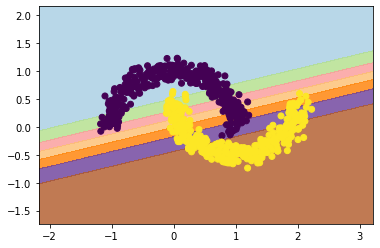

In [105]:
# Plot the decision boundary
x_min, x_max = X[:, 0].detach().numpy().min() - 1, X[:, 0].detach().numpy().max() + 1
y_min, y_max = X[:, 1].detach().numpy().min() - 1, X[:, 1].detach().numpy().max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
grid = torch.cat((torch.Tensor(xx.reshape(-1, 1)), torch.Tensor(yy.reshape(-1, 1))), 1)
grid = grid.type(torch.FloatTensor)
pred_grid = model(grid).detach().numpy()
pred_grid = pred_grid.reshape(xx.shape)
plt.contourf(xx, yy, pred_grid, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.detach().numpy())
plt.show()